In [1]:
import sys
sys.path.append("..")
import jsq_ps.models as jsq
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# Parameters
lambda_ = 10
mu = 10 / (0.75 * 3)
R = 3

# Hyperparameters
max_time = 50000
warmup = 200
mc_limit = 12
infty = 130

In [3]:
times = np.linspace(0, 3, 100)

# Theoretical

In [5]:
J = jsq.Method1(lambda_, mu, R, mc_limit, infty)
J.find_sojourn_time_cdf(times)

# Simulation

In [6]:
S = jsq.Simulation(lambda_, mu, R, max_time, warmup)
S.run(0)
S.find_sojourn_time_cdf(times)

100%|██████████| 50000.0/50000 [00:30<00:00, 1645.98it/s]           


# Compare

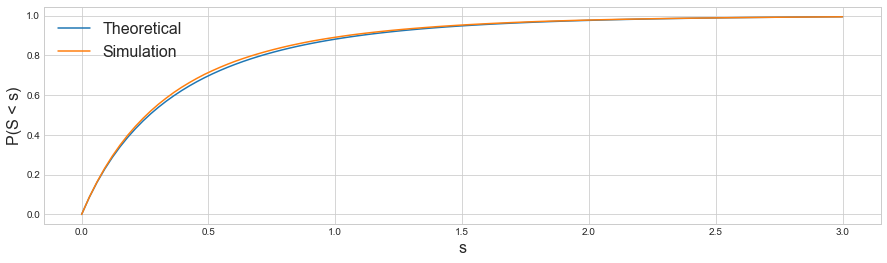

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 4))
ax.plot(times, J.sojourn_time_cdf, label='Theoretical')
ax.plot(times, S.sojourn_time_cdf, label='Simulation')
ax.set_ylabel('P(S < s)', fontsize=16)
ax.set_xlabel('s', fontsize=16)
ax.legend(loc=0, fontsize=16)
plt.show()

In [8]:
import aux.models as aux
aux.wasserstein_distance(J.sojourn_time_cdf, S.sojourn_time_cdf, times[1])

0.017229233154334795